In [41]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.1+cu118
0.16.1+cu118


1. Getting a dataset

In [42]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True, 
    transform=ToTensor(),
    target_transform=None
)

In [43]:
len(train_data), len(test_data)

(60000, 10000)

In [44]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

1.2 Visualize the data

Image shape: : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

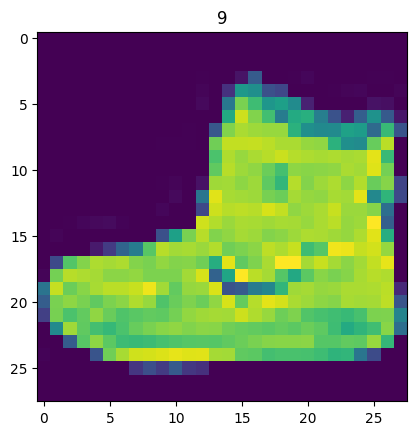

In [45]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

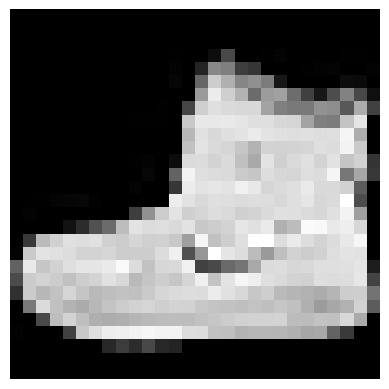

In [46]:
plt.imshow(image.squeeze(), cmap='grey')
plt.axis(False)

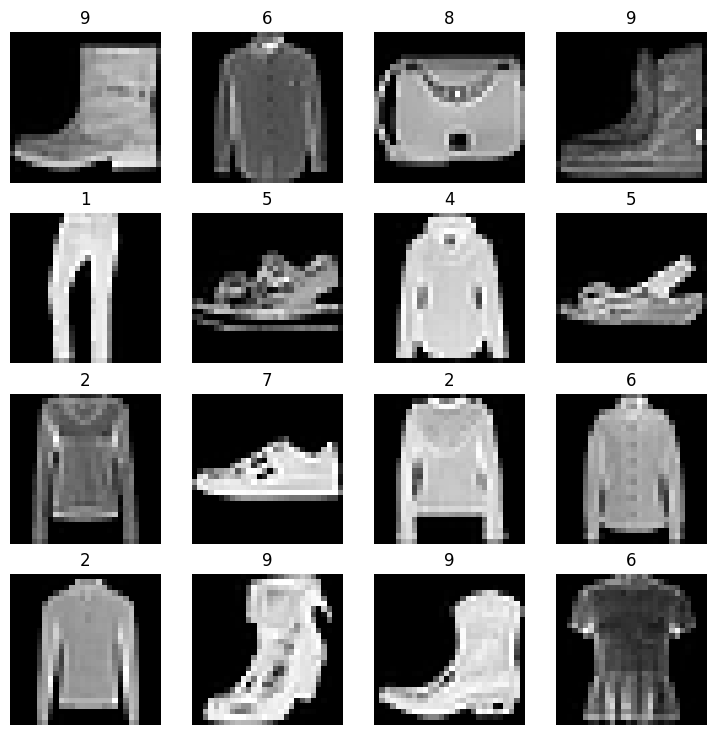

In [47]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    #print(i)
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="grey")
    plt.title(label)
    plt.axis(False)

In [48]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [49]:
## 2. prepare data loader - makes dataset iterable
from torch.utils.data import DataLoader

#Batchsize hyperparameter
BATCH_SIZE = 32

#Datasets to iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x224ee2ed150>,
 <torch.utils.data.dataloader.DataLoader at 0x224ee69bc50>)

In [50]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of Train DataLoaders: {len(train_dataloader)} batched of {BATCH_SIZE}")
print(f"Length of Test DataLoaders: {len(test_dataloader)} batched of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000224EE2ED150>, <torch.utils.data.dataloader.DataLoader object at 0x00000224EE69BC50>)
Length of Train DataLoaders: 1875 batched of 32
Length of Test DataLoaders: 313 batched of 32


In [51]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
label: 8, label size: torch.Size([])


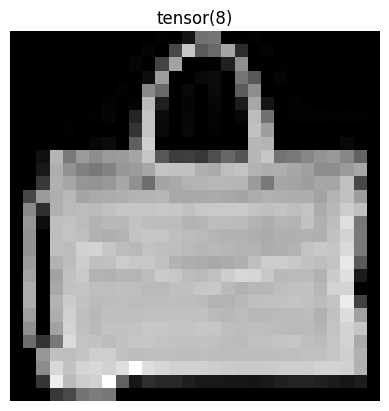

In [52]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(label)
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

3. Model_0: Build a baseline model  

In [53]:
#flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

#Flatten the sample
output = flatten_model(x)

#print
print(f"shape before flattening: {x.shape} --> [color_channels, height, width]")
print(f"shape before flattening: {output.shape} --> [color_channels, height*width]")

shape before flattening: torch.Size([1, 28, 28]) --> [color_channels, height, width]
shape before flattening: torch.Size([1, 784]) --> [color_channels, height*width]


In [54]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [55]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
            return self.layer_stack(x)

In [56]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=10
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [57]:
dummy_x = torch.rand([1, 1, 28, 28]) # batch, color channels, heigth, width
model_0(dummy_x).shape

torch.Size([1, 10])

In [58]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [59]:
### 3.1 setup loss, optimizer & eval metrix

import requests
from pathlib import Path

#Download helper functions 
if Path("helper_functions.py").is_file():
    print("Helper functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

Helper functions.py already exists, skipping download...


In [60]:
#import accuracy metric 

from helper_functions import accuracy_fn

#setup loss function & optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [61]:
#3.2 create functions to time experiments
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """ Prints difference between start and end.   """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [62]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


1.7700000171316788e-05

In [63]:
#Creating training loop & testing loop
from tqdm.auto import tqdm

#set the seed

torch.manual_seed(42)
train_time_start_on_cpu = timer()

#Set the number of epochs
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n------")
    ## Training 
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        #1 forward pass
        y_pred = model_0(X)

        #2. calculate loss
        loss = loss_fn(y_pred, y)
        train_loss +=loss

        #3. optimizer zero grad
        optimizer.zero_grad()

        #4. Loss Backward
        loss.backward()

        #5. optimizer step
        optimizer.step()

        #print out whats happening
        if batch % 400 == 0:
            print(f" Looked at {batch * len(X)}/{len(train_dataloader.dataset)}")
    #Divide total train loss by length of train data loader
    train_loss /= len(train_dataloader)

    ### Testing 
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            #Forward pass
            test_pred = model_0(X_test)

            #2. loss calculation
            test_loss += loss_fn(test_pred, y_test)
            #3. cal accuracy 
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        #Cal test loss avg per batch
        test_loss /= len(test_dataloader)

        #Cal test acc avg per batch
        test_acc  /= len(test_dataloader)
    # Print out what's happening 
    print(f" \n Train loss: {train_loss:.4f} Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

#calculate training time 
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------
 Looked at 0/60000
 Looked at 12800/60000
 Looked at 25600/60000
 Looked at 38400/60000
 Looked at 51200/60000


 33%|███▎      | 1/3 [00:08<00:17,  8.52s/it]

 
 Train loss: 0.5904 Test loss: 0.5095, Test acc: 82.0387
Epoch: 1 
------
 Looked at 0/60000
 Looked at 12800/60000
 Looked at 25600/60000
 Looked at 38400/60000
 Looked at 51200/60000


 67%|██████▋   | 2/3 [00:16<00:08,  8.03s/it]

 
 Train loss: 0.4763 Test loss: 0.4799, Test acc: 83.1969
Epoch: 2 
------
 Looked at 0/60000
 Looked at 12800/60000
 Looked at 25600/60000
 Looked at 38400/60000
 Looked at 51200/60000


100%|██████████| 3/3 [00:23<00:00,  7.91s/it]

 
 Train loss: 0.4550 Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 23.720 seconds


4. Make predictions & get Model 0 results 


In [64]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, 
               accuracy_fn,
               device=device):
    """ Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            #Make Predictions 
            y_pred = model(X)

            #Accumulate the loss and acc values per batch 
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        #Scale loss & acc 
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"Model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

#Calculate model 1 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_0_results        

{'Model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

5. Setup device agnostic-code 

In [65]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [66]:
torch.cuda.is_available()

False

In [67]:
#Setup device-gnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [68]:
### 
#Model with linear & non-linear 
import torch
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


In [69]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=10).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [70]:
device

'cpu'

6.1 setup loss fn & eval metrics

In [71]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


6.2 Functionizing training & eval/testing loops

In [72]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """ Performs a training with model trying to learn on data_loader."""

    train_loss, train_acc = 0, 0
    #put model to training mode 
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        
        #Put data on target device 
        X, y = X.to(device), y.to(device)

        #1 forward pass 
        y_pred = model(X)

        #2. calculate loss & accuracy
        loss = loss_fn(y_pred, y)
        train_loss +=loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        #3. optimizer zero grad
        optimizer.zero_grad()

        #4. Loss Backward
        loss.backward()

        #5. optimizer step
        optimizer.step()

    #Divide total train loss & accuracy by length of train data loader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [73]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """ Performs a testing loop step on model going over data_loader"""
    test_loss, test_acc = 0, 0

    #Put the model in eval mode
    model.eval()

    #Turn on Inference Mode context manager 
    with torch.inference_mode():
        for X, y in data_loader:
            #send to device 
            X, y = X.to(device), y.to(device)

            #1.Forward pass (Outputs raw logits)
            test_pred = model(X)

            #2. Calculate loss/acc
            test_loss += loss_fn(test_pred, y) 
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels
            
        #Adjust metrics and print out
        test_loss /= len(data_loader)   
        test_acc /= len(data_loader)
        print(f" Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}%\n")


In [74]:
torch.manual_seed(42)

#Measure time 
from timeit import default_timer as Timer
train_time_start_on_cpu = timer()

#Set epochs
epochs = 3

#Create optimization & eval loop using train_step & test_step
for epoch in tqdm(range(epochs)):
    print(f"Epochs: {epoch} \n-------------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                             device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0 
-------------
Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:07<00:15,  7.84s/it]

 Test loss: 0.95636 | Test acc: 64.99601%

Epochs: 1 
-------------
Train loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [00:15<00:07,  7.75s/it]

 Test loss: 0.72227 | Test acc: 73.91174%

Epochs: 2 
-------------
Train loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [00:23<00:00,  7.71s/it]

 Test loss: 0.68500 | Test acc: 75.01997%

Train time on cpu: 23.131 seconds


In [75]:
model_0_results

{'Model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [76]:
total_train_time_model_0

23.720409600000494

In [77]:
#Get model 1 results dictionary 
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'Model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [92]:
##Model 2: Building CNN 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture replicates the TinyVGG
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # Values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*0,
                      out_features=output_shape)
        )
        
def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x)

In [93]:
image.shape

torch.Size([1, 28, 28])

In [96]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [95]:
torch.manual_seed(42)
class_names = 10
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=10).to(device)

7.1 Stepping through nn.Conv2d()

In [111]:
torch.manual_seed(42)

images = torch.randn(size=(1, 1, 28, 20))
test_img = image[0].repeat(1, 3, 1, 1)
print(f"Image batch shape: {images.shape}")
print(f"Single image shape:")

Image batch shape: torch.Size([1, 1, 28, 20])
Single image shape:


In [112]:
test_img.shape

torch.Size([1, 3, 28, 28])

In [123]:

#Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(5, 5),
                       stride=1,
                       padding=1)

#Pass the data through the convolutional layer
conv_output = conv_layer(test_img)
conv_output.shape

torch.Size([1, 10, 26, 26])

In [124]:
test_img.unsqueeze(0).shape

torch.Size([1, 1, 3, 28, 28])

In [120]:
torch.__version__

'2.1.1+cu118'

7.2 Stepping through nn.MaxPool2d()

In [126]:
test_img.shape

torch.Size([1, 3, 28, 28])

In [128]:
#Print ut original image shape without unsqueezed dimension
print(f"Test image original shape: { test_img.shape}")
print(f"Test image with unsqueezed dimensione: { test_img.unsqueeze(0).shape}")

#Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_img.unsqueeze(dim=0))
print(f"Shape after going through conv layer(): {test_image_through_conv.shape}")




Test image original shape: torch.Size([1, 3, 28, 28])
Test image with unsqueezed dimensione: torch.Size([1, 1, 3, 28, 28])
